In [1]:
# uncomment and run this if you are on colab
# !pip install pyballmapper

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm

## Generate data

In [4]:
from sklearn import datasets

n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=0.3, noise=0.05, random_state=42)
print(X.shape)

(1000, 2)


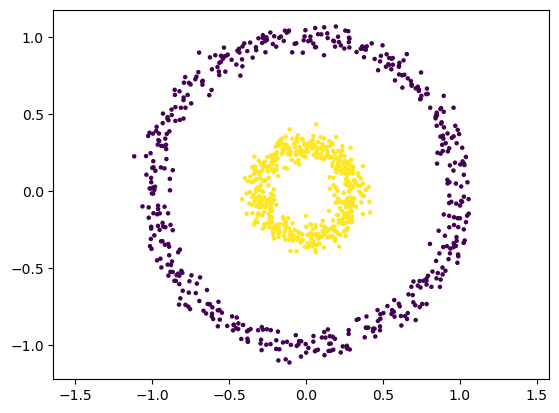

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=5)
plt.axis('equal')
plt.show()

## Create BallMapper graph

In [6]:
from pyballmapper import BallMapper

In [7]:
bm = BallMapper(X = X,
                eps = 0.25)

In [8]:
# bm.Graph is a networkx graph

# we use the cluster id as coloring functions
bm.add_coloring(coloring_df=pd.DataFrame(y, columns=['y']))

# here we adopt a standard colour palette
from matplotlib import colormaps as cm
my_palette = cm.get_cmap('viridis')

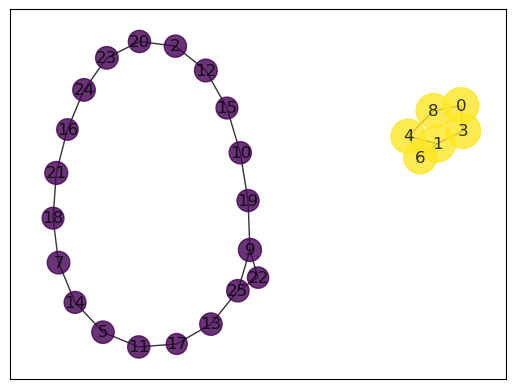

In [9]:
plt.figure()
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networkx(coloring_variable='y', color_palette=my_palette)
plt.show()

## BM with reverse ordering

In [12]:
# we can change the order of the points 
# this will affect the landmarks selection
# for example, lets use the reverse ordering
bm_reverse = BallMapper(X = X,      
                        eps = 0.25,  
                        order = list(reversed(range(len(X)))) # reverse ordering
                       ) 

In [13]:
bm_reverse.add_coloring(coloring_df=pd.DataFrame(y, columns=['y']))

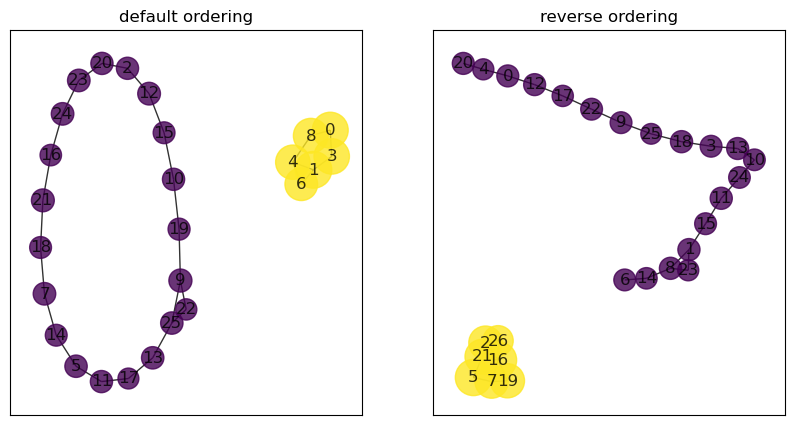

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))

bm.draw_networkx(coloring_variable='y', color_palette=my_palette, this_ax=axs[0])
bm_reverse.draw_networkx(coloring_variable='y', color_palette=my_palette, this_ax=axs[1])

axs[0].set_title('default ordering')
axs[1].set_title('reverse ordering')

plt.show()

# why is this happening???

let us take a closer look at balls 21 and 7...

they really do not have any points in common!

if you do not believe it, the figure below is saved in `high_def.pdf`, try zooming in

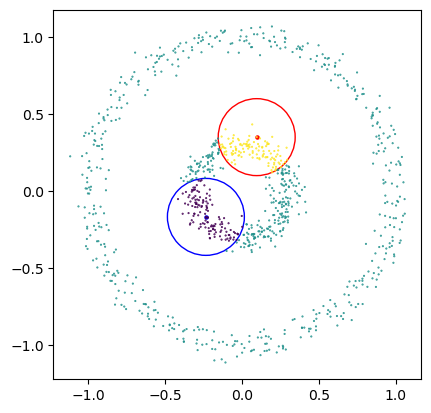

In [15]:
color = [0 for i in range(len(X))]
for i in range(len(X)):
    if i in  bm_reverse.points_covered_by_landmarks[7]:
        color[i] = 1
    elif i in  bm_reverse.points_covered_by_landmarks[21]:
        color[i] = -1

fig, ax = plt.subplots()

ax.set_aspect('equal')

lndmk1 = X[bm_reverse.Graph.nodes[7]['landmark']]
ax.scatter(lndmk1[0], lndmk1[1], s=5, c='r')
cir1 = plt.Circle((lndmk1[0], lndmk1[1]), 0.25, color='r',fill=False)

lndmk2 = X[bm_reverse.Graph.nodes[21]['landmark']]
ax.scatter(lndmk2[0], lndmk2[1], s=5, c='b')
cir2 = plt.Circle((lndmk2[0], lndmk2[1]), 0.25, color='b',fill=False)
ax.add_patch(cir1)
ax.add_patch(cir2)


ax.scatter(X[:,0], X[:,1], c=color, cmap='viridis', s=0.25)

#plt.savefig('high_def.pdf')
plt.show()

## Shuffle points

Permute the input point cloud to obtain different collections of landmars and different graphs.

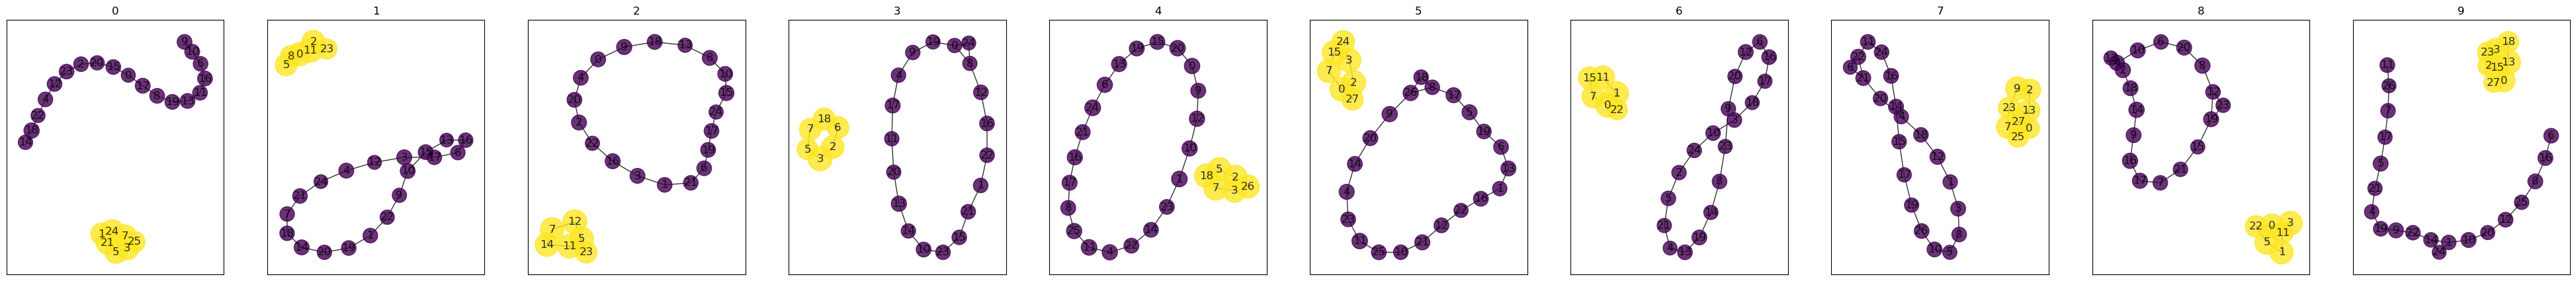

In [17]:
rng = np.random.default_rng(seed=66)

num_it = 10

fig, axs = plt.subplots(1,num_it, figsize=(5*num_it, 5))

for i in range(num_it):

    shuffle = rng.permutation(range(len(X))).tolist()

    bm_shuffled = BallMapper(X = X,      
                        eps = 0.25,   
                        order = shuffle) # shuffled ordering

    bm_shuffled.add_coloring(coloring_df=pd.DataFrame(y, columns=['y']))
    clear_output()
                       
    bm_shuffled.draw_networkx(coloring_variable='y', color_palette=my_palette, this_ax=axs[i])
    axs[i].set_title(i)

plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>